In [2]:
import sys
sys.path.append('../ACALIB')
import acalib
import matplotlib.pyplot as plt

%matplotlib inline

/Users/mauricio/anaconda/envs/jupyter/lib/python3.5/site-packages/skimage/filter/__init__.py:6: skimage_deprecation: The `skimage.filter` module has been renamed to `skimage.filters`.  This placeholder module will be removed in v0.13.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '


In [5]:
c = acalib.Container()
c.load_fits('../bindata/fits/cubes/Orion.methanol.cbc.contsub.image.fits')
cube = c.primary

#Better results with threshold

rms = acalib.noise_level(cube)
cube = acalib.denoise(cube, threshold=rms)

INFO: Processing HDU 0 (Image) [acalib.io.fits]
INFO: 4D data detected: assuming RA-DEC-FREQ-STOKES (like CASA-generated ones), and dropping STOKES [acalib.io.fits]


In [19]:
#Creating Spectra Sketcher
import acalib.core as cr
spectra,slices= cr.spectra_sketch(cube.data,10000)

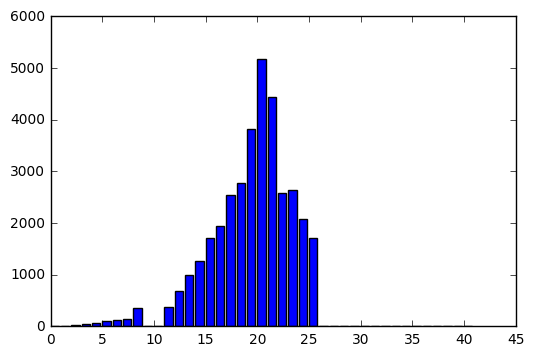

[slice(0, 9, None), slice(11, 26, None)]

In [22]:

#Getting frecuencies
xs = cube.data.shape[1]
ys = cube.data.shape[2]
frecs_len = cube.data.shape[0]
frecs = range(frecs_len)

#Plotting spectra
plt.bar(frecs,spectra)
plt.show()
slices

In [21]:
img = ss.vel_stacking(slices[0])
plt.imshow(img.data)
plt.show()

AttributeError: 'tuple' object has no attribute 'vel_stacking'

In [29]:
rd = acalib.algorithms.GaussianSegmentation(0.3, 10/100)
objects, images = rd.gaussian_mix(img,True)
objects.show_in_notebook()

RA,DEC
83.809382743,-5.37634223905


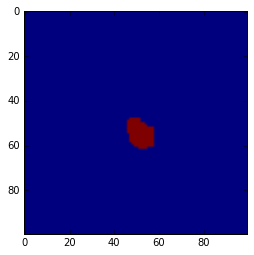

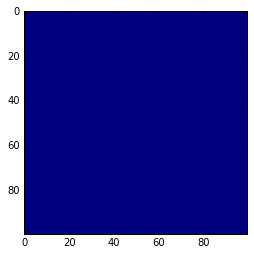

In [30]:
for i in range(len(images)):
    plt.imshow(images[i].data)
    plt.show()